In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report
)

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


In [4]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)

# Preprocessing

In [7]:
print("Dataset Info:")
print(df.info())

df.dropna(inplace=True)  # Drop missing values if any

X = df.drop("num", axis=1) # Changed 'target' to 'num'
y = df["num"] # Changed 'target' to 'num'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB
None


# Training Logistic Model

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.32      0.33      0.32        60
weighted avg       0.55      0.60      0.57        60

Akurasi  : 0.6000
Presisi  : 0.5516
Recall   : 0.6000
F1-Score : 0.5656
AUC      : 0.8185


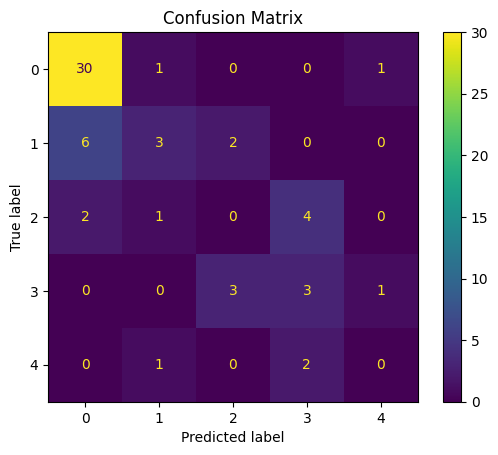

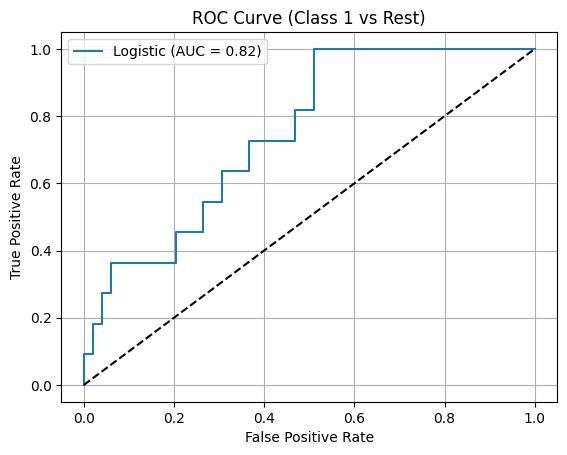

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1) # Plotting for class 1 vs rest as an example
plt.plot(fpr, tpr, label=f"Logistic (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Class 1 vs Rest)")
plt.legend()
plt.grid(True)
plt.show()

# Penjelasan Matematika

#### **1. Akurasi (Accuracy)**
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
Mengukur seberapa banyak prediksi yang benar dibanding total data.

---

#### **2. Presisi (Precision)**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
Seberapa akurat prediksi positif yang dibuat oleh model.

---

#### **3. Recall (Sensitivity / TPR)**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
Mengukur seberapa banyak data positif berhasil dideteksi.

---

#### **4. F1 Score**
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$
Rata-rata harmonik dari precision dan recall.

---

#### **5. AUC (Area Under Curve)**
AUC mengukur **kemampuan model membedakan antara dua kelas**, dihitung dari luas di bawah kurva ROC.

---

#### **6. ROC Curve**
Kurva yang menunjukkan trade-off antara **True Positive Rate** dan **False Positive Rate** pada berbagai threshold klasifikasi.

---

Keterangan:
- TP = True Positives
- TN = True Negatives
- FP = False Positives
- FN = False Negatives